In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df=pd.read_csv(url,sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [5]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
probas=model.predict_proba(x_test)

C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Accuracy Score : 0.45918367346938777


C:\Users\madha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

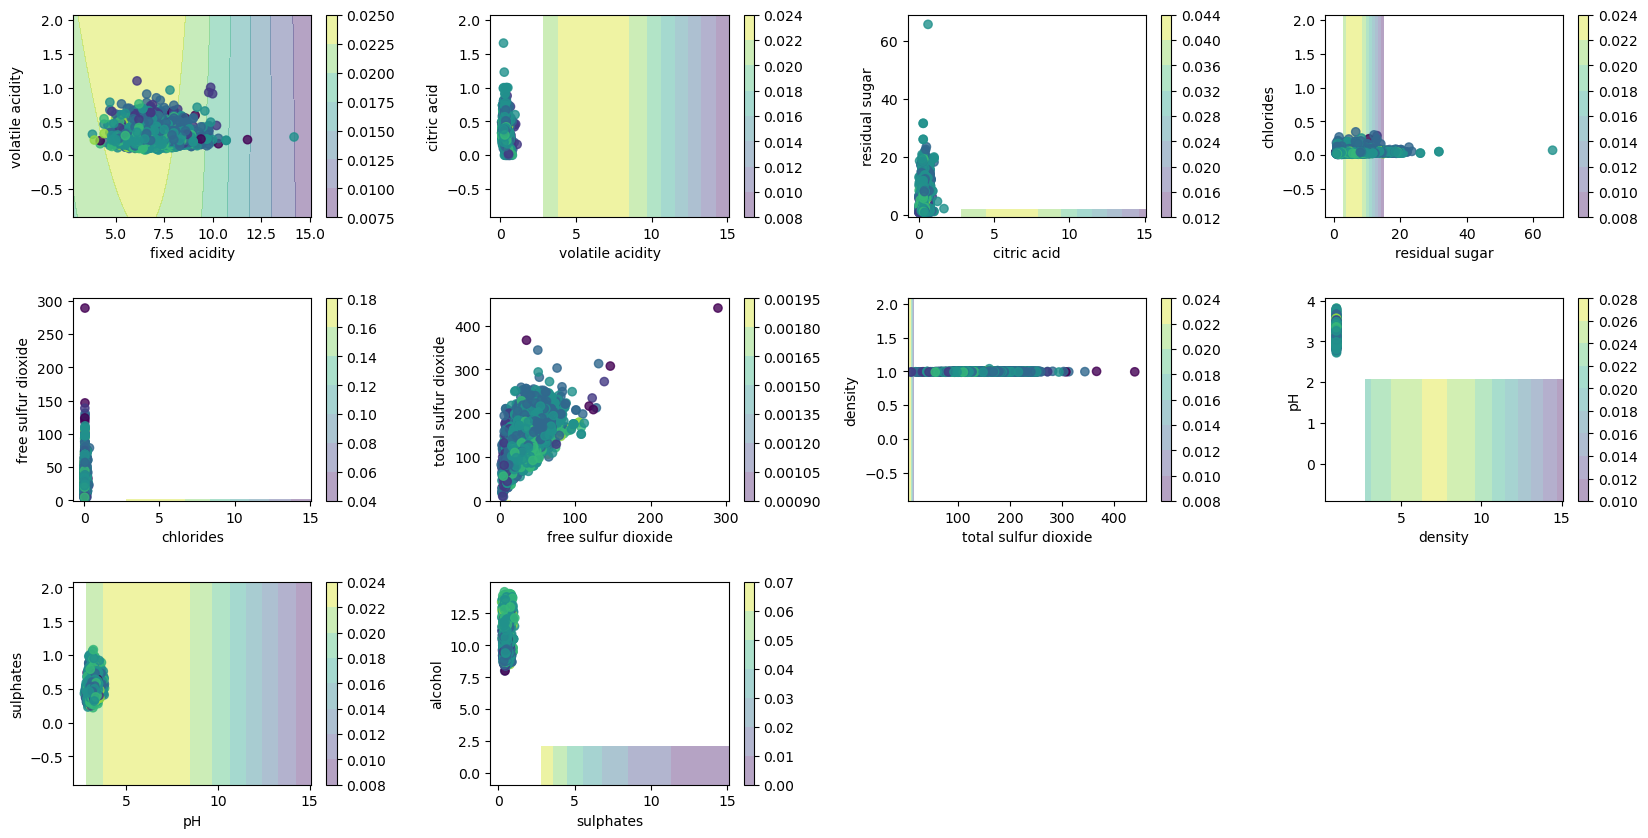

In [11]:
plt.figure(figsize=(20,10))
x_min,x_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
y_min,y_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

for i in range(2,12):
    plt.subplot(3,4,i-1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    X_plot=np.zeros((xx.shape[0]*xx.shape[1],11))
    X_plot[:,0]=xx.ravel()
    X_plot[:,1]=yy.ravel()
    for j in range(2,12):
        if i!=j:
            X_plot[:,j-1]=X[X.columns[j-1]].mean()
    Z=model.predict_proba(X_plot)[:,1]
    Z=Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,alpha=0.4)
    plt.colorbar()
    plt.scatter(X.iloc[:,i-2],X.iloc[:,i-1],c=Y,alpha=0.8)
    plt.xlabel(X.columns[i-2])
    plt.ylabel(X.columns[i-1])
    
plt.show()